In [37]:
!pip install tensorflow
!pip install tensorflow-datasets

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow import keras

In [4]:
print(tf.__version__)
print(hub.__version__)

2.15.0
0.16.1


In [5]:
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT available")

GPU is NOT available


In [39]:
train_data, validation_data, test_data = tfds.load(name="imdb_reviews",
                                                   split=('train[:60%]', 'train[:60%]', 'test'),
                                                  as_supervised=True)

In [7]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [38]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
test_examples_batch, test_labels_batch = next(iter(test_data.batch(10)))

In [9]:
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [10]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [11]:
train_examples_batch[:2]

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [12]:
train_labels_batch[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 0])>

In [20]:
#model = "https://tfhub.dev/google/nnlm-en-dim50/2"
#model = "https://kaggle.com/models/google/nnlm/frameworks/TensorFlow2/variations/en-dim128-with-normalization/versions/1"
#model = "/kaggle/input/nnlm/tensorflow2/en-dim128-with-normalization/1"

#hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [14]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [15]:
hub_layer(train_examples_batch[:5])

<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064],
       [ 1.5165    , -0.71034056,  1.8556767 , -1.2033532 , -1.3105817 ,

In [16]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 400373 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [21]:
history = model.fit(train_data.shuffle(10000).batch(100), epochs=30,
                    validation_data = validation_data.batch(100), verbose=1)

Epoch 1/30
150/150 [==============================] - 5s 32ms/step - loss: 0.3370 - accuracy: 0.8608 - val_loss: 0.2971 - val_accuracy: 0.8826
Epoch 2/30
150/150 [==============================] - 4s 24ms/step - loss: 0.2828 - accuracy: 0.8900 - val_loss: 0.2516 - val_accuracy: 0.9061
Epoch 3/30
150/150 [==============================] - 5s 32ms/step - loss: 0.2453 - accuracy: 0.9077 - val_loss: 0.2168 - val_accuracy: 0.9217
Epoch 4/30
150/150 [==============================] - 6s 36ms/step - loss: 0.2129 - accuracy: 0.9231 - val_loss: 0.1891 - val_accuracy: 0.9315
Epoch 5/30
150/150 [==============================] - 5s 32ms/step - loss: 0.1856 - accuracy: 0.9341 - val_loss: 0.1643 - val_accuracy: 0.9424
Epoch 6/30
150/150 [==============================] - 6s 39ms/step - loss: 0.1646 - accuracy: 0.9430 - val_loss: 0.1430 - val_accuracy: 0.9545
Epoch 7/30
150/150 [==============================] - 5s 32ms/step - loss: 0.1441 - accuracy: 0.9515 - val_loss: 0.1358 - val_accuracy: 0.9570

In [23]:
results = model.evaluate(test_data.batch(100), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s = %.3f" % (name, value))

250/250 - 3s - loss: 0.8059 - accuracy: 0.8387 - 3s/epoch - 10ms/step
loss = 0.806
accuracy = 0.839


In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

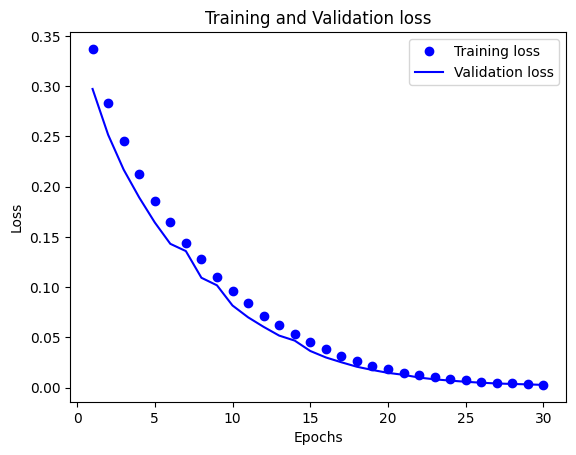

In [35]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

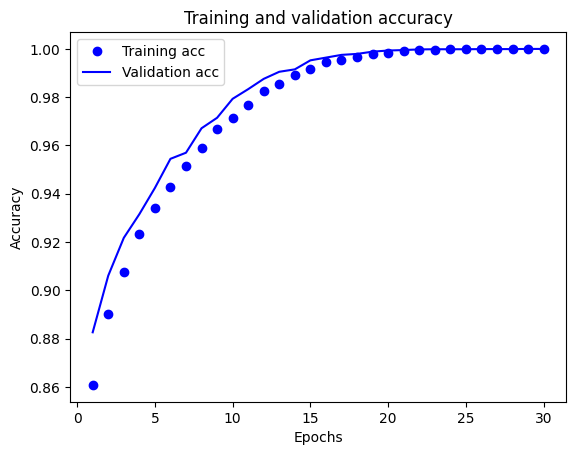

In [27]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [40]:
y_pred = model.predict(test_examples_batch)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(test_labels_batch,y_pred))

1/1 [==============================] - 0s 120ms/step
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       0.00      0.00      0.00         7

    accuracy                           0.30        10
   macro avg       0.15      0.50      0.23        10
weighted avg       0.09      0.30      0.14        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
